In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'C:/Users/kathr/Downloads/Nava_Research/GJ3222_RVs_HARPS.dat.rtf'

df=pd.read_csv(path,sep='\s+',header=None,usecols=[1,2,3],names=['times','RV','RVerr'])
df

,times,RV,RVerr
0,2.456569e+06,13.530,0.998
1,2.456569e+06,14.735,1.033
2,2.456571e+06,13.787,0.993
3,2.456576e+06,9.429,0.954
4,2.456576e+06,8.352,0.948
...,...,...,...
56,2.457714e+06,-3.265,1.136
57,2.457770e+06,3.913,1.070
58,2.457770e+06,4.210,1.068
59,2.458036e+06,-26.920,1.023


# Define Functions

In [12]:
import numpy as np
from astropy.timeseries import LombScargle
import random
import pandas as pd
import matplotlib.pyplot as plt


###########  PGRAM CALC  ############

def pgram(t, y, dy, minper, maxper, faprate, strat = 'auto', x = 'pers', wind = 0):

    #####  INPUTS  #####
    
    ### t : observation times
    ### y : observation values (Fluxes, RVs, etc.)
    ### dy : observation errors
    ### minper : min period for range of pers in pgram calc.
    ### maxper : max period ''
    ### faprate : false alarm probability (FAP) rate cutoff (if 1%, set 0.01)
    
    ### x = 'pers' returns periods and pgram powers
      #    x = 'freq' reeturns frequencies and pgram powers
      
    ### stat = 'auto' uses astropy's auto frequency generator
      #     with 'samples_per_peak' set to 10 to make freq array,
      #     OTHERWISE strat = integer # of elements desired in frequency array

    #####  RETURNS  #####

    ### per/freq: period or frequency array depending on input 'x'
    ### power: associated pgram power array
    ### fap: power associated with input FAP rate cutoff

    #####  CODE  #####

    if wind == 0:
        ls = LombScargle(t, y, dy)     ###Generalized Lomb-Scargle

    if wind == 1:
        y = np.ones(t.size, dtype=np.longdouble)
        dy = 0.

        ls = LombScargle(t, y, dy, center_data=False, fit_mean=False)
        

    if strat == 'auto':
        if wind == 0:
            freq, power = ls.autopower(minimum_frequency=1/maxper, \
                                   maximum_frequency=1/minper, \
                                   samples_per_peak=10)
        if wind == 1:
            freq, power = ls.autopower(minimum_frequency=1/maxper, \
                                   maximum_frequency=1/minper, \
                                   samples_per_peak=10, method = 'scipy')

    else:
        freq = 1. / np.linspace(maxper, minper, strat)

        if wind == 0:
            power = ls.power(freq)
            
        if wind == 1:
            power = ls.power(freq, method = 'scipy')

    if wind == 0:
        fap = ls.false_alarm_level([faprate])   #require 1% fap rate
    else:
        fap = 0.

    if x == 'pers':
        per = 1/freq
        order = np.argsort(per)
        per = per[order]
        power = power[order]

        return per, power, fap

    else:
        return freq, power, fap
            


#########  WINDOW FUNCTION CALC  ###########

'''
def windowfn_calc(t, minper, maxper, faprate, strat = 'auto', x = 'pers'):

    #####  INPUTS  #####

    ###see 'pgram' - same except no y or dy here

    #####  RETURNS  #####

    ### per_freq : power or frequency array depending on input 'x'
    ### wpow : associated window function pgram power
    ### wfap : window fn power associated with input FAP rate cutoff

    #####  CODE  #####

    #set all y vars to 1 with all same MUCH SMALLER error (1e-10)

    #cont = 0

    #while cont == 0:
    ys = np.ones(t.size, dtype=np.float128) #+ np.random.uniform(size=t.size, low = -1.e-5, high = 1.e-5)
    err = 1.e-10

    #run pgram on flat signal
    per_freq, wpow, wfap = pgram(t, ys, err, minper, maxper, faprate, strat = strat, x = x, center = 'False')

    #    if np.size(np.where(np.isfinite(wpow) == False)) == 0:
    #        if np.size(np.where(wpow < 0)) == 0:
    #            cont = 1

    return per_freq, wpow, wfap

'''



"\ndef windowfn_calc(t, minper, maxper, faprate, strat = 'auto', x = 'pers'):\n\n    #####  INPUTS  #####\n\n    ###see 'pgram' - same except no y or dy here\n\n    #####  RETURNS  #####\n\n    ### per_freq : power or frequency array depending on input 'x'\n    ### wpow : associated window function pgram power\n    ### wfap : window fn power associated with input FAP rate cutoff\n\n    #####  CODE  #####\n\n    #set all y vars to 1 with all same MUCH SMALLER error (1e-10)\n\n    #cont = 0\n\n    #while cont == 0:\n    ys = np.ones(t.size, dtype=np.float128) #+ np.random.uniform(size=t.size, low = -1.e-5, high = 1.e-5)\n    err = 1.e-10\n\n    #run pgram on flat signal\n    per_freq, wpow, wfap = pgram(t, ys, err, minper, maxper, faprate, strat = strat, x = x, center = 'False')\n\n    #    if np.size(np.where(np.isfinite(wpow) == False)) == 0:\n    #        if np.size(np.where(wpow < 0)) == 0:\n    #            cont = 1\n\n    return per_freq, wpow, wfap\n\n"

# Data

Text(0.5, 1.0, 'GJ3222')

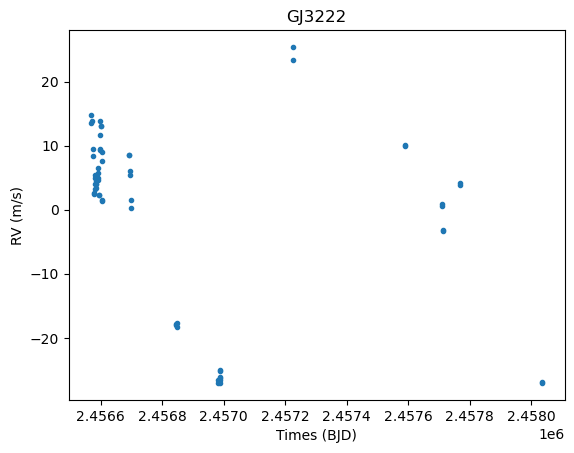

In [4]:
plt.plot(df.times,df.RV,'.')
plt.xlabel('Times (BJD)')
plt.ylabel('RV (m/s)')
plt.title('GJ3222')

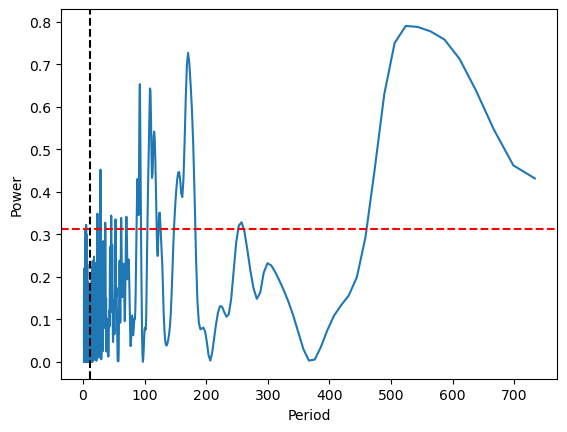

In [36]:
#from pgram import pgram

#pgram(t, y, dy, minper, maxper, faprate, strat = 'auto', x = 'pers', wind = 0)

minper = 1.5 # above 1 day to avoid 1 day peak due to daily observations
maxper = (df.times.max() - df.times.min())/2 # can't charterize period longer than half dataset
faprate = 0.01 #statistically significant peak 

[period,power,fap] = pgram(df.times,df.RV,df.RVerr,minper,maxper,faprate)
#period[['per','pow','fap']] = [period,power,fap]

plt.plot(period,power,'-')
plt.xlabel('Period')
plt.ylabel('Power')
plt.axhline(y=fap,linestyle='--',color='red')
plt.axvline(x=10.7,linestyle='--',color='black')

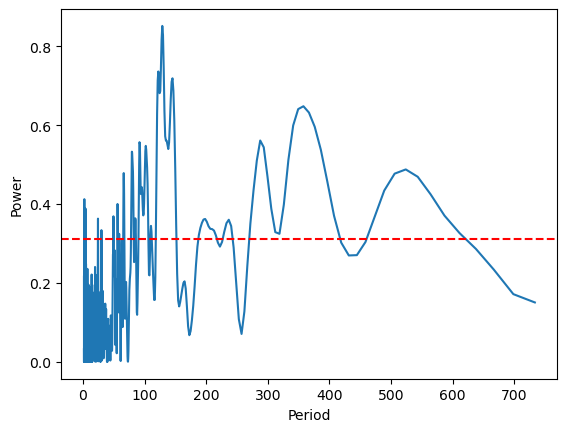

In [15]:
[periodw,powerw,fapw] = pgram(df.times,df.RV,df.RVerr,minper,maxper,faprate,wind=1)

plt.plot(periodw,powerw,'-')
plt.xlabel('Period')
plt.ylabel('Power')
plt.axhline(y=fap,linestyle='--',color='red')

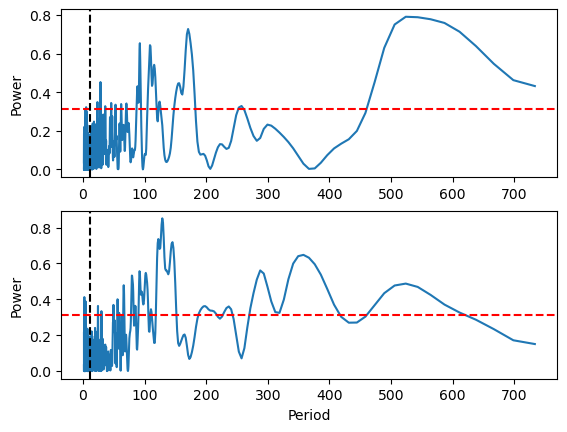

In [38]:
fig,ax = plt.subplots(2,1)

ax[0].plot(period,power,'-')
plt.xlabel('Period')
ax[0].set_ylabel('Power')
ax[0].axhline(y=fap,linestyle='--',color='red')

plt.plot(periodw,powerw,'-')
plt.xlabel('Period')
plt.ylabel('Power')
plt.axhline(y=fap,linestyle='--',color='red')


#ax[0].plot([10.7,10.7],[0,0.8],linestyle='--',color='black')
ax[0].axvline(x=10.7,linestyle='--',color='black')
ax[1].axvline(x=10.7,linestyle='--',color='black')